In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import requests
import random

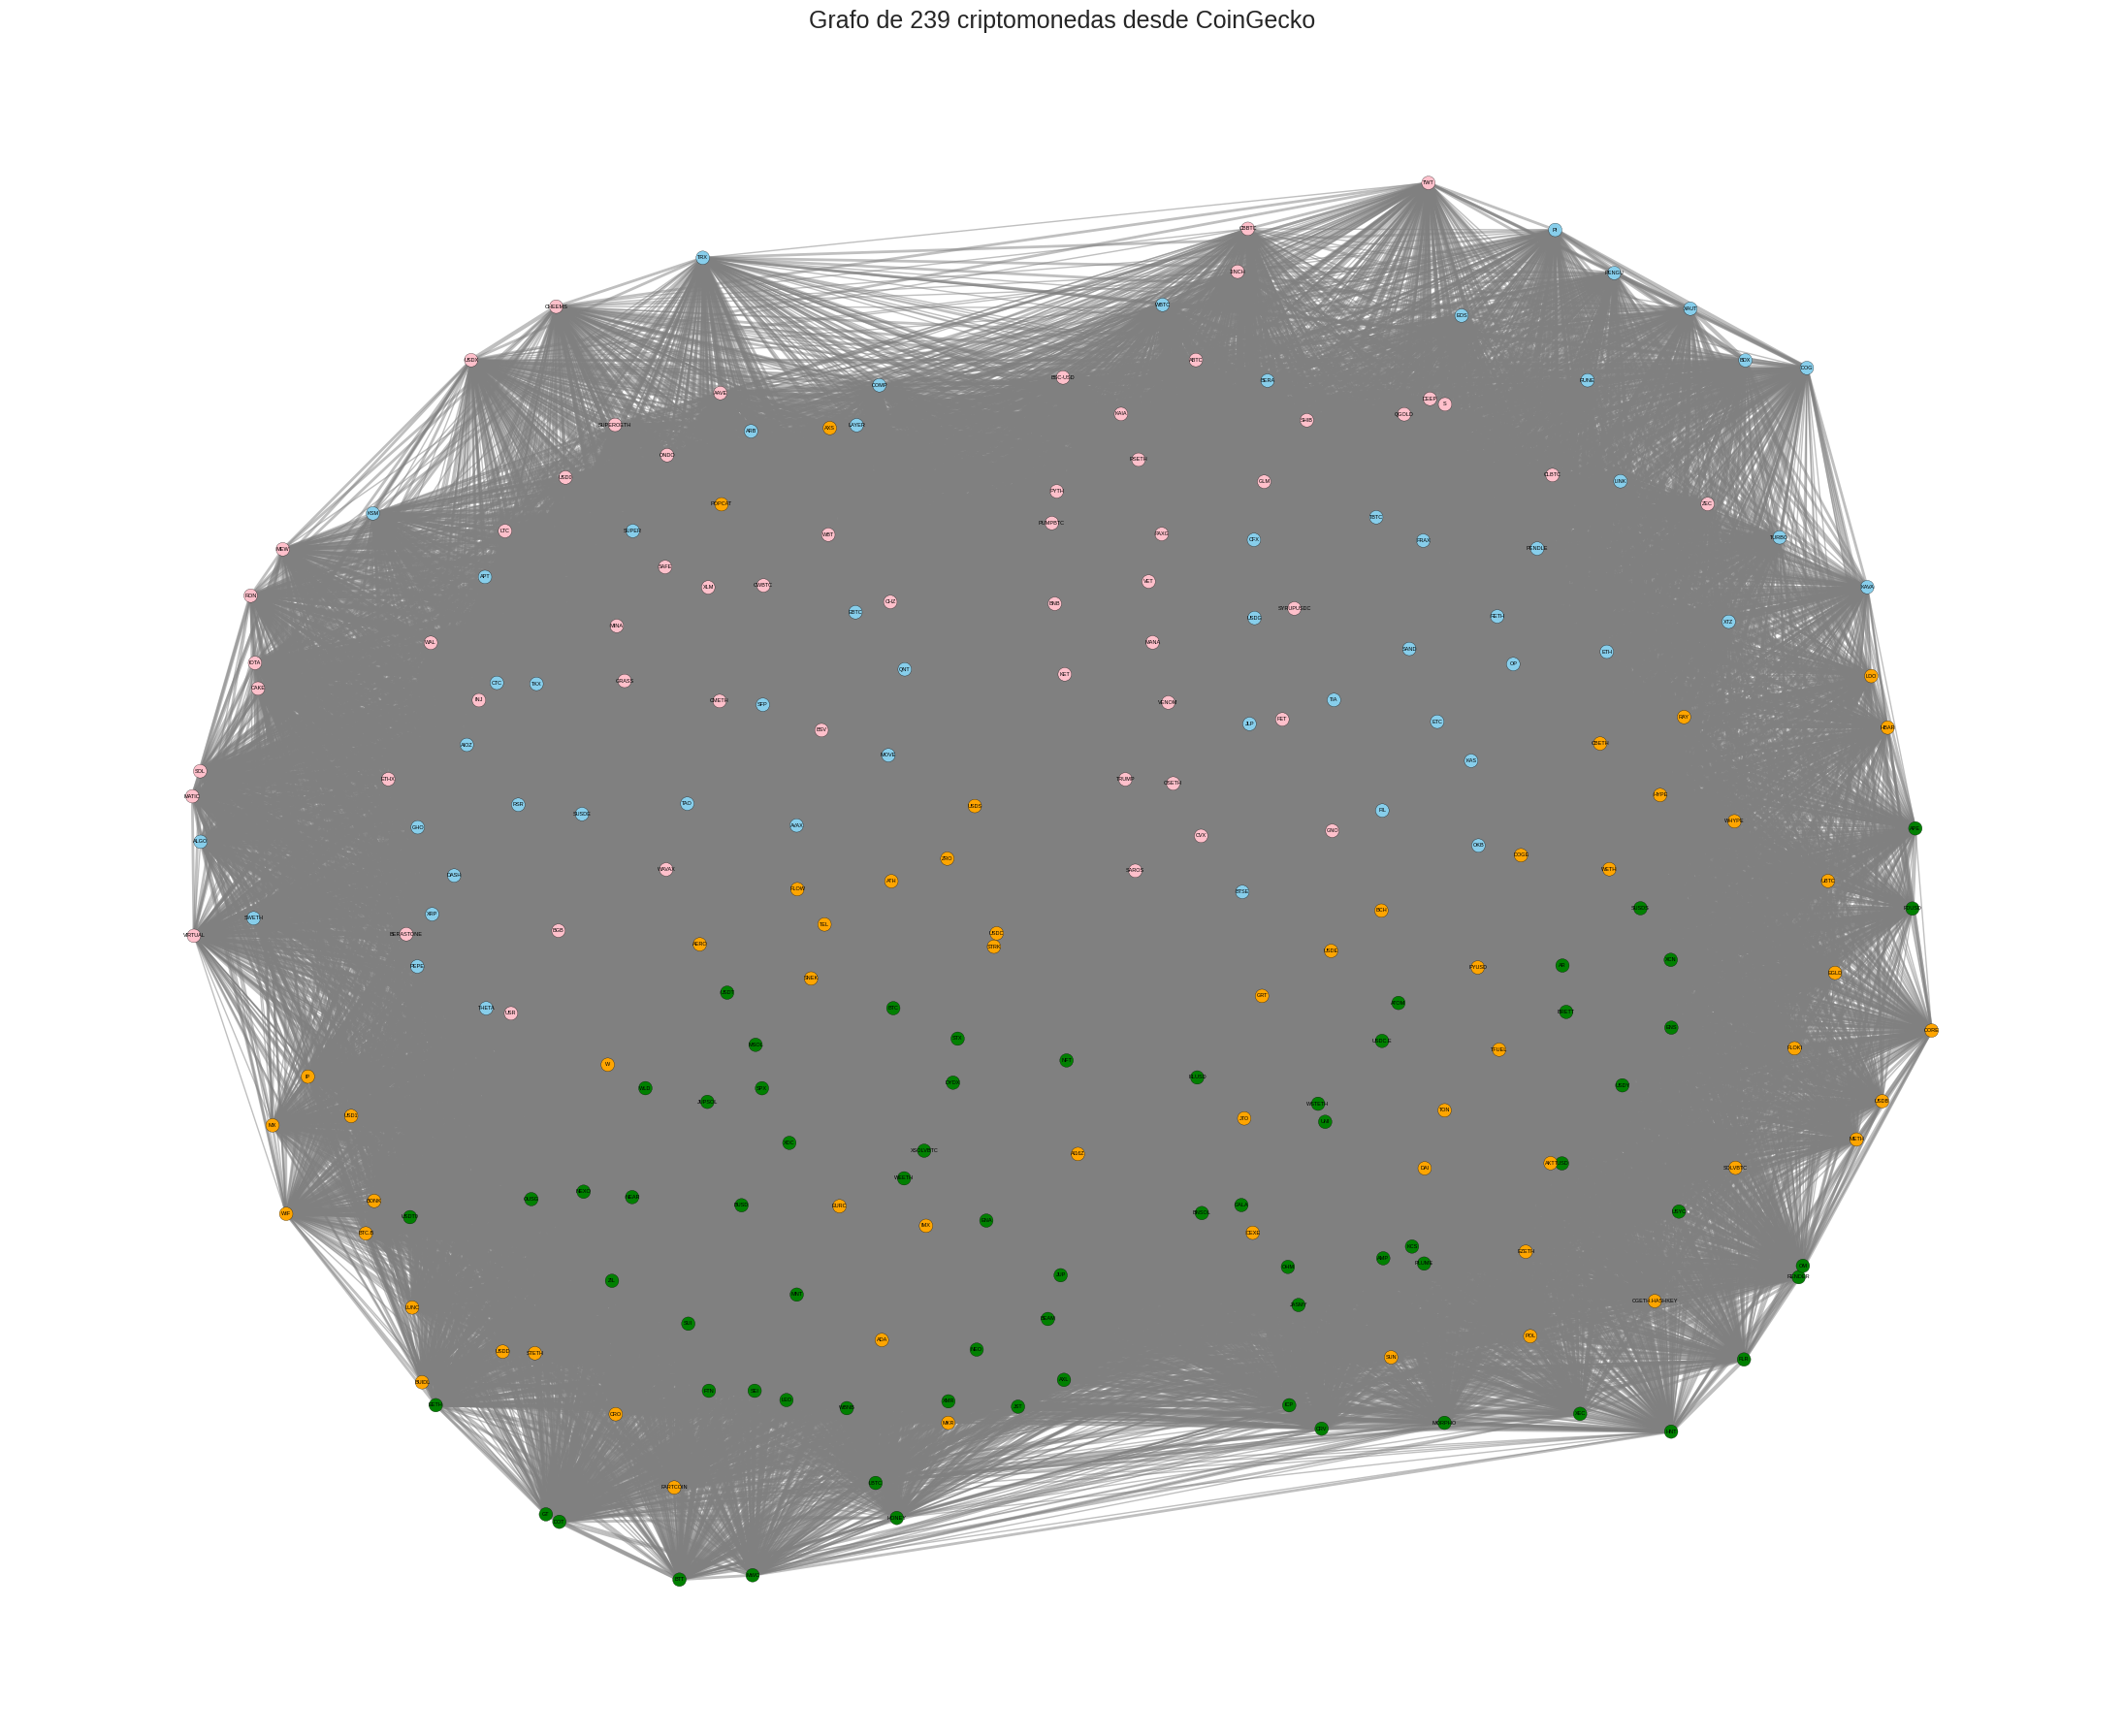

In [ ]:
LIMIT = 250
CATEGORIAS_SIMPLIFICADAS = ['Meme', 'Gaming', 'IA', 'RWA']
EXCHANGES_FAKE = ['Binance', 'Coinbase', 'KuCoin', 'Kraken', 'OKX']
COLORES = {'IA': 'skyblue', 'Gaming': 'orange', 'RWA': 'green', 'Meme': 'pink'}

criptos = {}
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': LIMIT,
    'page': 1,
    'sparkline': 'false'
}

response = requests.get(url, params=params)
data = response.json()

for coin in data:
    ticker = coin['symbol'].upper()
    nombre = coin['name']
    categoria = random.choice(CATEGORIAS_SIMPLIFICADAS)
    exchanges = set(random.sample(EXCHANGES_FAKE, random.randint(1, 3)))
    multichain = random.choice([True, False])

    criptos[ticker] = {
        'nombre': nombre,
        'categoria': categoria,
        'exchanges': exchanges,
        'multichain': multichain
    }

G = nx.Graph()
for ticker, datos in criptos.items():
    G.add_node(ticker, label=datos['nombre'], categoria=datos['categoria'], color=COLORES[datos['categoria']])

criptos_lista = list(criptos.keys())
for i in range(len(criptos_lista)):
    for j in range(i + 1, len(criptos_lista)):
        a = criptos_lista[i]
        b = criptos_lista[j]
        peso = 0

        if criptos[a]['categoria'] == criptos[b]['categoria']:
            peso += 1
        if criptos[a]['exchanges'] & criptos[b]['exchanges']:
            peso += 1
        if criptos[a]['multichain'] == criptos[b]['multichain']:
            peso += 1

        if peso > 0:
            G.add_edge(a, b, weight=peso)

subG = G.subgraph(G.nodes())
pos = nx.spring_layout(subG, seed=42, k=0.12)
colores_nodos = [subG.nodes[n]['color'] for n in subG.nodes()]
pesos_aristas = [subG[u][v]['weight'] for u, v in subG.edges()]

plt.figure(figsize=(22, 18))
plt.style.use("seaborn-v0_8-white")

nx.draw_networkx_nodes(subG, pos, node_color=colores_nodos, node_size=100, edgecolors='black', linewidths=0.2)
nx.draw_networkx_edges(subG, pos, width=pesos_aristas, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(subG, pos, labels={n: n for n in subG.nodes()}, font_size=4)

plt.title(f"Grafo de {len(subG.nodes())} criptomonedas desde CoinGecko", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
criptos = {
    'DOGE': {'nombre': 'Dogecoin', 'categoria': 'Meme', 'exchanges': {'Binance', 'Coinbase'}, 'multichain': False},
    'SHIB': {'nombre': 'Shiba Inu', 'categoria': 'Meme', 'exchanges': {'Binance'}, 'multichain': True},
    'PEPE': {'nombre': 'Pepe', 'categoria': 'Meme', 'exchanges': {'KuCoin'}, 'multichain': False},
    'FLOKI': {'nombre': 'Floki Inu', 'categoria': 'Meme', 'exchanges': {'Binance'}, 'multichain': True},
    'WIF': {'nombre': 'dogwifhat', 'categoria': 'Meme', 'exchanges': {'KuCoin'}, 'multichain': False},
    'FET': {'nombre': 'Fetch.ai', 'categoria': 'IA', 'exchanges': {'Binance', 'Coinbase'}, 'multichain': True},
    'AGIX': {'nombre': 'SingularityNET', 'categoria': 'IA', 'exchanges': {'Binance'}, 'multichain': True},
    'OCEAN': {'nombre': 'Ocean Protocol', 'categoria': 'IA', 'exchanges': {'Coinbase'}, 'multichain': False},
    'NRN': {'nombre': 'Neural Radiance', 'categoria': 'IA', 'exchanges': {'KuCoin'}, 'multichain': False},
    'CTX': {'nombre': 'Cortex', 'categoria': 'IA', 'exchanges': {'Binance'}, 'multichain': True},
    'SAND': {'nombre': 'The Sandbox', 'categoria': 'Gaming', 'exchanges': {'Binance', 'KuCoin'}, 'multichain': True},
    'AXS': {'nombre': 'Axie Infinity', 'categoria': 'Gaming', 'exchanges': {'Binance', 'Coinbase'}, 'multichain': True},
    'GALA': {'nombre': 'Gala', 'categoria': 'Gaming', 'exchanges': {'KuCoin'}, 'multichain': False},
    'ENJ': {'nombre': 'Enjin Coin', 'categoria': 'Gaming', 'exchanges': {'Binance', 'KuCoin'}, 'multichain': True},
    'ILV': {'nombre': 'Illuvium', 'categoria': 'Gaming', 'exchanges': {'Binance'}, 'multichain': True},
    'CFG': {'nombre': 'Centrifuge', 'categoria': 'RWA', 'exchanges': {'Coinbase'}, 'multichain': False},
    'MPL': {'nombre': 'Maple', 'categoria': 'RWA', 'exchanges': {'Coinbase'}, 'multichain': False},
    'ONDO': {'nombre': 'Ondo Finance', 'categoria': 'RWA', 'exchanges': {'Binance'}, 'multichain': False},
    'TRU': {'nombre': 'TrueFi', 'categoria': 'RWA', 'exchanges': {'Binance', 'KuCoin'}, 'multichain': True},
    'XDC': {'nombre': 'XDC Network', 'categoria': 'RWA', 'exchanges': {'KuCoin'}, 'multichain': True},
    'RLC': {'nombre': 'iExec RLC', 'categoria': 'IA', 'exchanges': {'Binance'}, 'multichain': True},
    'VAI': {'nombre': 'Vai', 'categoria': 'IA', 'exchanges': {'KuCoin'}, 'multichain': False},
    'LOKA': {'nombre': 'League of Kingdoms', 'categoria': 'Gaming', 'exchanges': {'Binance'}, 'multichain': True},
    'PYR': {'nombre': 'Vulcan Forged PYR', 'categoria': 'Gaming', 'exchanges': {'KuCoin'}, 'multichain': True},
    'IMX': {'nombre': 'ImmutableX', 'categoria': 'Gaming', 'exchanges': {'Coinbase'}, 'multichain': True},
    'RWA': {'nombre': 'RWA Token', 'categoria': 'RWA', 'exchanges': {'KuCoin'}, 'multichain': True},
    'GLMR': {'nombre': 'Moonbeam', 'categoria': 'RWA', 'exchanges': {'Binance'}, 'multichain': True},
    'FLOKI2': {'nombre': 'FlokiX', 'categoria': 'Meme', 'exchanges': {'KuCoin'}, 'multichain': True},
    'TURBO': {'nombre': 'Turbo', 'categoria': 'Meme', 'exchanges': {'Binance'}, 'multichain': False},
    'JEET': {'nombre': 'Jeet Coin', 'categoria': 'Meme', 'exchanges': {'KuCoin'}, 'multichain': False},
    'GME': {'nombre': 'GameStop Meme', 'categoria': 'Meme', 'exchanges': {'Coinbase'}, 'multichain': True},
    'GPT': {'nombre': 'CryptoGPT', 'categoria': 'IA', 'exchanges': {'Binance'}, 'multichain': True},
    'CHAT': {'nombre': 'ChatAI', 'categoria': 'IA', 'exchanges': {'KuCoin'}, 'multichain': False},
    'RAI': {'nombre': 'RAI Reflex Index', 'categoria': 'RWA', 'exchanges': {'Coinbase'}, 'multichain': False},
    'USDN': {'nombre': 'Neutrino USD', 'categoria': 'RWA', 'exchanges': {'KuCoin'}, 'multichain': False},
    'WAXP': {'nombre': 'WAX', 'categoria': 'Gaming', 'exchanges': {'KuCoin'}, 'multichain': True},
    'YGG': {'nombre': 'Yield Guild Games', 'categoria': 'Gaming', 'exchanges': {'Binance'}, 'multichain': True},
    'CHMB': {'nombre': 'Chumbi Valley', 'categoria': 'Gaming', 'exchanges': {'KuCoin'}, 'multichain': False}
}


In [ ]:
colores = {
    'IA': 'skyblue',
    'Gaming': 'orange',
    'RWA': 'green',
    'Meme': 'pink'
}

In [ ]:
G = nx.Graph()

for ticker, datos in criptos.items():
    G.add_node(ticker, label=datos['nombre'], categoria=datos['categoria'], color=colores[datos['categoria']])

criptos_lista = list(criptos.keys())
for i in range(len(criptos_lista)):
    for j in range(i + 1, len(criptos_lista)):
        a = criptos_lista[i]
        b = criptos_lista[j]
        peso = 0

        if criptos[a]['categoria'] == criptos[b]['categoria']:
            peso += 1
        if criptos[a]['exchanges'] & criptos[b]['exchanges']:
            peso += 1
        if criptos[a]['multichain'] == criptos[b]['multichain']:
            peso += 1

        if peso > 0:
            G.add_edge(a, b, weight=peso)

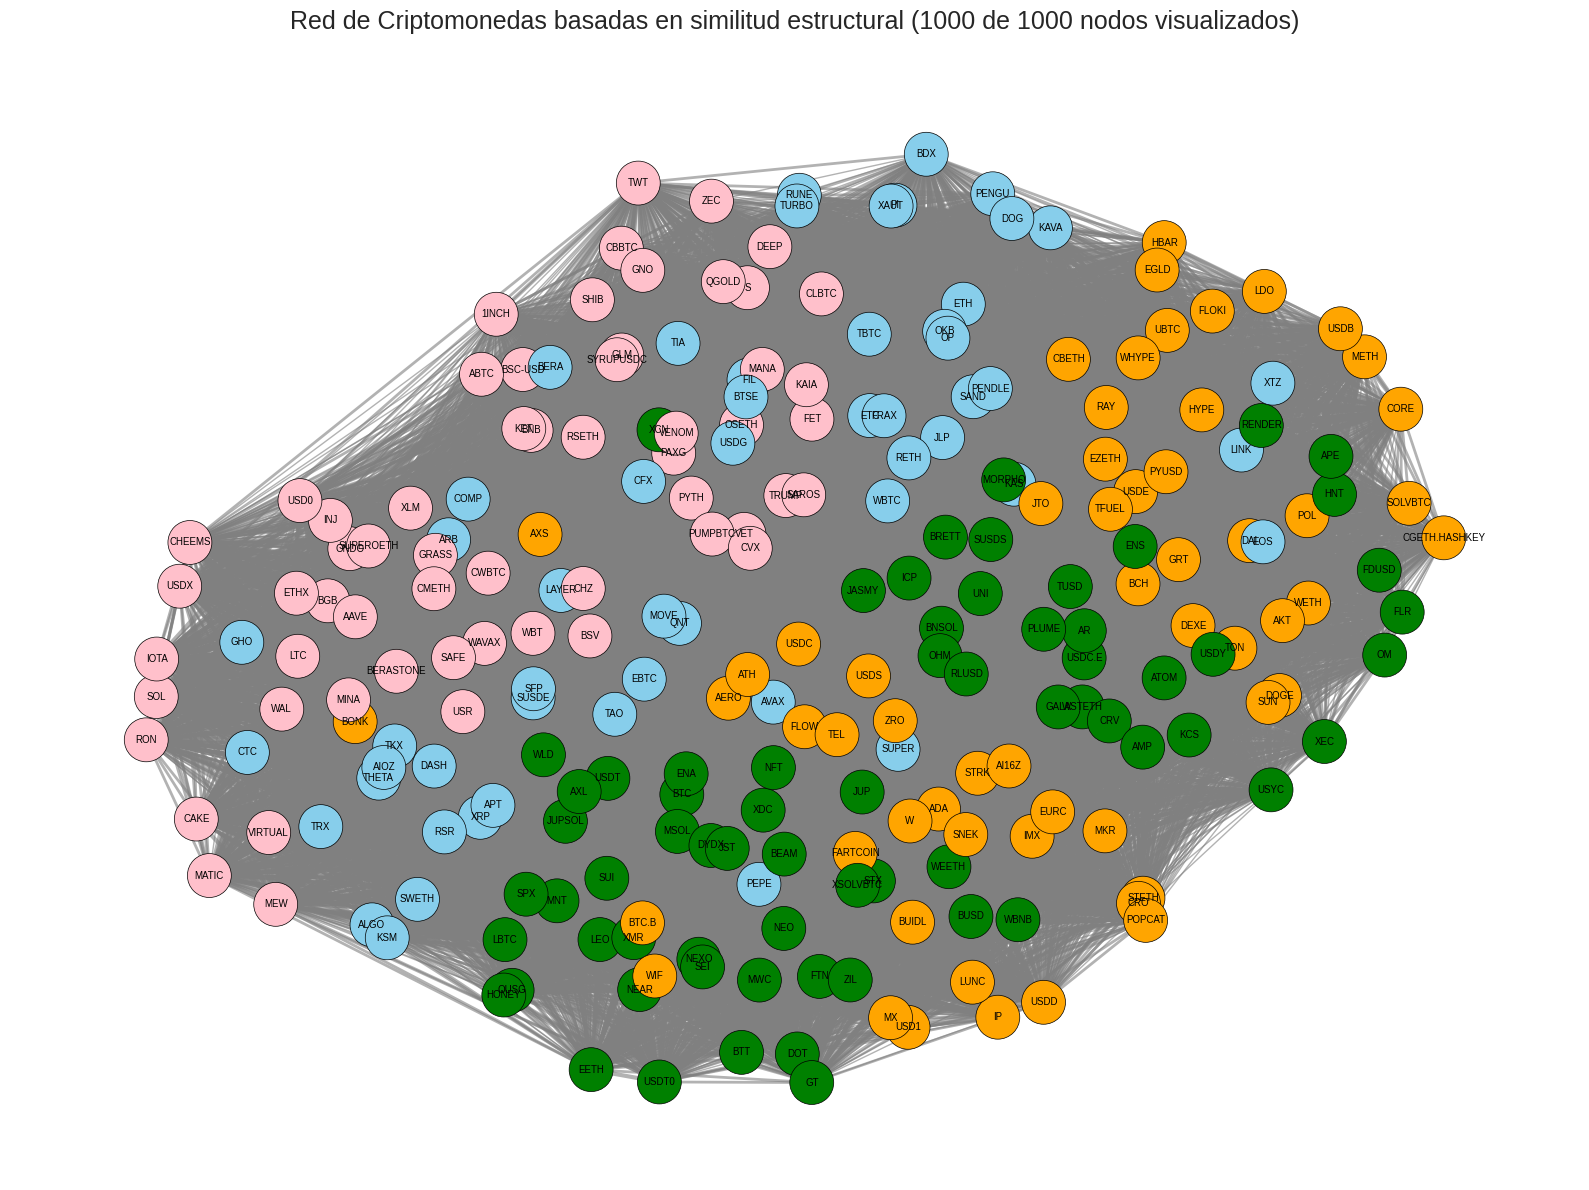

In [ ]:
sub_nodos = list(G.nodes())[:1000]
subG = G.subgraph(sub_nodos)

pos = nx.spring_layout(subG, seed=42, k =0.1)
colores_nodos = [subG.nodes[n]['color'] for n in subG.nodes()]
pesos_aristas = [subG[u][v]['weight'] for u, v in subG.edges()]

plt.figure(figsize=(16, 12))
plt.style.use("seaborn-v0_8-white")

nx.draw_networkx_nodes(subG, pos, node_color=colores_nodos, node_size=1000, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(subG, pos, width=pesos_aristas, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(subG, pos, labels={n: n for n in subG.nodes()}, font_size=7, font_color='black')

plt.title("Red de Criptomonedas basadas en similitud estructural (1000 de 1000 nodos visualizados)", fontsize=18, pad=20)
plt.axis('off')
plt.tight_layout()
plt.show()